<a href="https://colab.research.google.com/github/Noor-Z1/Machine-Learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FOR C value:  1


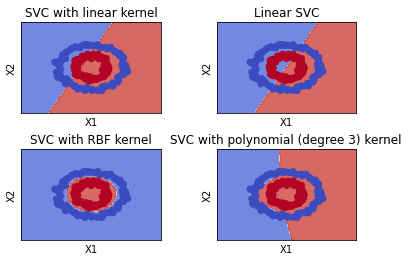

FOR C value:  3


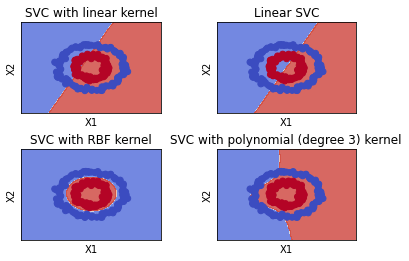

In [ ]:
import pickle
import numpy as np
import sklearn.svm as svm
import matplotlib.pyplot as plt




#the path is updated according to path in my file directory
dataset, labels = pickle.load(open("part2_dataset1.data", "rb"))

#library implementation
X = dataset
y = labels

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

C= [1.0, 3.0]

# SVM regularization parameter

for i in range(len(C)):

  print("FOR C value:  %d" %(C[i]))

  svc = svm.SVC(kernel='linear', C=C[i]).fit(X, y)
  rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C[i]).fit(X, y)
  poly_svc = svm.SVC(kernel='poly', degree=3, C=C[i]).fit(X, y)
  lin_svc = svm.LinearSVC(C=C[i]).fit(X, y)

  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

  # title for the plots
  titles = ['SVC with linear kernel',
            'Linear SVC',
            'SVC with RBF kernel',
            'SVC with polynomial (degree 3) kernel']


  for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])


  plt.show()








In [ ]:
#for part2

import pickle
import numpy as np
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt




def confidence_interval(x, N):

   lower = np.mean(x) - ((1.96) * ( np.std(x) / np.sqrt(N) ))
   upper = np.mean(x) + ((1.96) * ( np.std(x) / np.sqrt(N) ))

   return lower, upper


#please update the path as per the file location in your pc
dataset, labels = pickle.load(open("part2_dataset2.data", "rb"))

parameter_grid = {   "C": [0.1, 0.5, 1],
                     "kernel": ["poly", "rbf", "linear"]
              }

svc_overall_performance = []
svm = SVC()


cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=None)
gridsearch_cv = GridSearchCV(SVC(), parameter_grid, scoring="accuracy", cv=cross_validation, verbose=True, refit=True)

gridsearch_cv.fit(dataset,labels)

all_comb_svm = gridsearch_cv.cv_results_['params']

#this for loop allows to get each hyperparamater and its scores in the n_repeats

for params in gridsearch_cv.cv_results_['params']:
  print(params)
  index = [k for k, val in enumerate( np.array(params) == np.array(all_comb_svm)  ) if val]
  index= index[0]


  array_of_scores_of_this_hyper = [gridsearch_cv.cv_results_['split{i}_test_score'.format(i = k) ][index]  for k in range(25) ]
  print(array_of_scores_of_this_hyper)
  print("Mean score of this hyperparam: ")
  print(np.mean(np.array(array_of_scores_of_this_hyper))*100 )
  print("With the confidence Interval: ")
  Ci, CI = confidence_interval(array_of_scores_of_this_hyper, len(array_of_scores_of_this_hyper))
  print( " [ %f  %f ]" %(Ci*100, CI*100))

  print("---------------------------------------------------\n")


print("Best estimator: ")
print(gridsearch_cv.best_estimator_)


"""
predicted = gridsearch_cv.best_estimator_.predict(dataset)
print(accuracy_score(labels, predicted)*100)
"""





Fitting 50 folds for each of 9 candidates, totalling 450 fits
{'C': 0.1, 'kernel': 'poly'}
[0.6666666666666666, 0.6666666666666666, 0.8, 0.8666666666666667, 0.8, 0.7333333333333333, 0.8, 0.8666666666666667, 0.6666666666666666, 0.7333333333333333, 0.7333333333333333, 0.8666666666666667, 0.6666666666666666, 0.8, 0.6666666666666666, 0.7333333333333333, 0.8666666666666667, 0.8, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.8, 0.7333333333333333, 0.8, 0.8666666666666667]
Mean score of this hyperparam: 
76.53333333333333
With the confidence Interval: 
 [ 73.855974  79.210693 ]
---------------------------------------------------

{'C': 0.1, 'kernel': 'rbf'}
[0.9333333333333333, 0.8666666666666667, 0.7333333333333333, 0.7333333333333333, 0.9333333333333333, 0.8, 0.8, 0.9333333333333333, 0.7333333333333333, 0.8, 0.9333333333333333, 0.9333333333333333, 0.8, 0.8, 0.8, 0.7333333333333333, 0.9333333333333333, 0.8666666666666667, 0.7333333333333333, 0.8666666666666667, 0.866666666666

'\npredicted = gridsearch_cv.best_estimator_.predict(dataset)\nprint(accuracy_score(labels, predicted)*100)\n'